### Name: Aaron Paul Lewis

# K-Means Cluster Analysis

# Kaggle: Mall Customer Segmentation Data
## Market Basket Analysis

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


In [1]:
#! pip install ipywidgets
#! pip install plotly-express
#!pip install folium
#!pip install geopy
#!pip install dabl
#!pip install scikit-learn
#!pip install kneed

In [2]:
# Importing important libraries

# Basic operations
import numpy as np

# For DataFrame manipulations
import pandas as pd

# For date time manipulation
import datetime

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly stuff
import plotly.express as px
#import plotly.plotly as py
import plotly.graph_objs as go

# For interactivity

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# For interactive shells
from IPython.display import display

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# For missing values
#!pip install missingno
import missingno as mno

# For K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

# For data analysis
import dabl

In [3]:
# Define seed for reproducibility
seed = 0

In [4]:
# Read the Dataset and also check the time it takes to load the data
%time data=pd.read_csv("Mall_Customers.csv")
pd.set_option('max_columns', 200)
data.head()

Wall time: 11 ms


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
# Let's drop the CustomerID column
data.drop('CustomerID', axis = 1, inplace = True)

In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
# Calculate the total number of missing data in each column
total_missing = data.isnull().sum().sort_values(ascending = False)
total_missing

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Gender                    0
dtype: int64

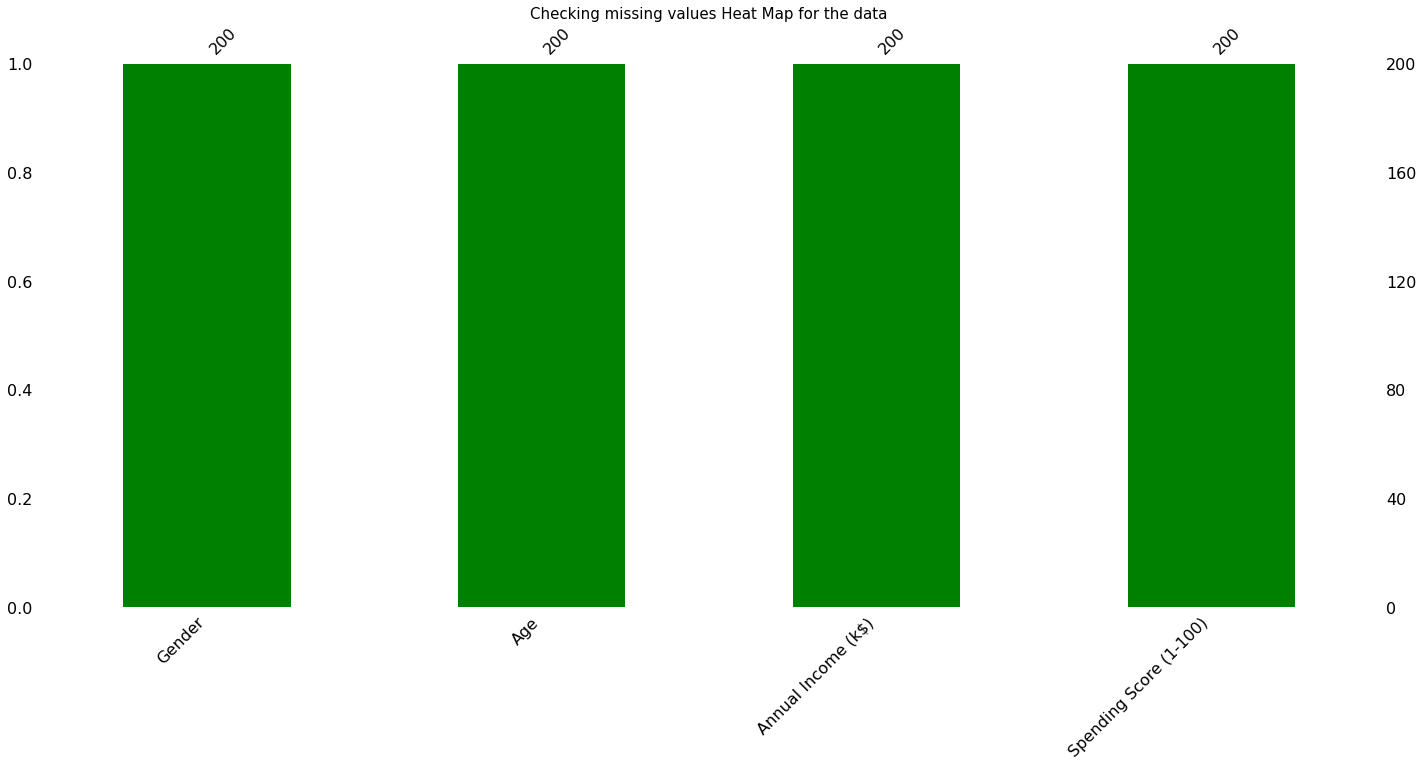

In [9]:
# Check for NULL value using the missingno library
# Visualize the missing values as a matrix
# The gross and budget columns have the largest percentage of missing values

mno.bar(data,
       color = 'green',
       sort = 'ascending')
plt.title('Checking missing values Heat Map for the data', fontsize = 15)
plt.show()


In [10]:
# Again, to check if there are any NULL data
data.isnull().any().any()

False

# Let's describe the data for the numerical columns

In [11]:
pd.set_option('max_columns', 20)
data.describe().T.style.background_gradient(cmap = 'cividis', axis = 1)

# Let's describe the data for the categorical columns

In [12]:
pd.set_option('max_columns', 20)
data.describe(include = 'object').T.style.background_gradient(cmap = 'cividis')

In [13]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

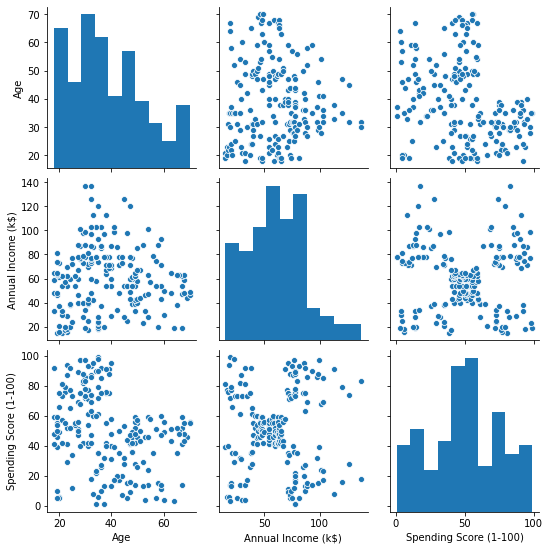

In [14]:
# Let's get the pairplot of the data
sns.pairplot(data, palette = 'spring')
plt.show()

# Check the Correlation Between the Numerical Variables

In [15]:
list(data.columns)

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

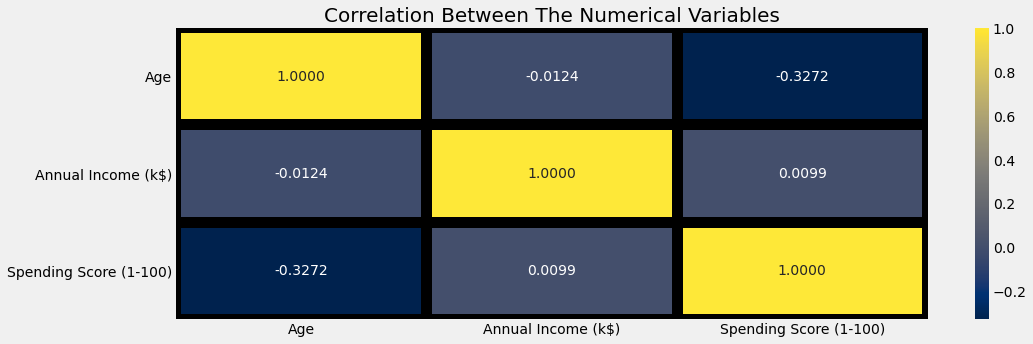

In [16]:
# Check the Correlation Heat Map of the data
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr,
           cmap = 'cividis',
           annot = True,
           #mask = mask, 
           fmt = '0.4f',
           linecolor = 'black',
           linewidths = 10)

plt.title('Correlation Between The Numerical Variables', fontsize = 20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 10)
plt.show()

# Using the dabl library to quickly visualize the dataset

Target looks like regression


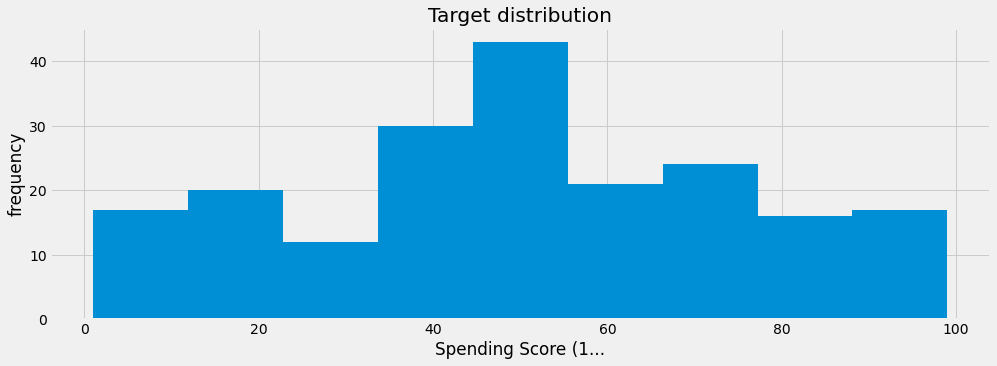

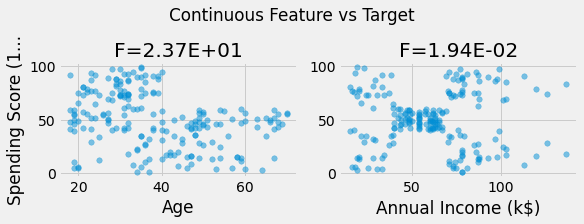

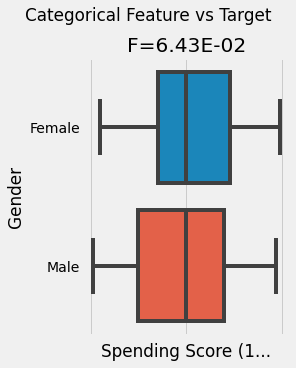

In [17]:
# let's analyze the data with respect to Spending Score, which is the target column
dabl.plot(data, target_col = 'Spending Score (1-100)');

Target looks like regression


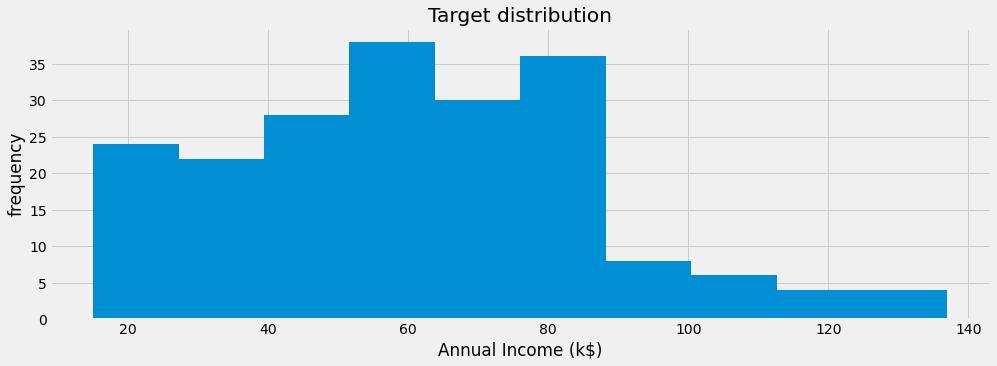

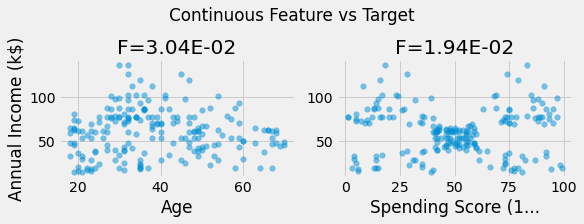

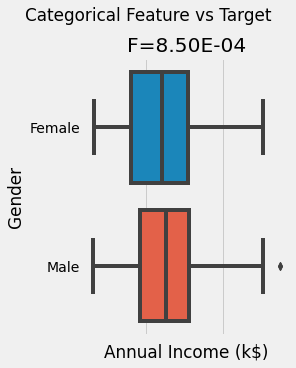

In [18]:
# Let's analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)');

# Data Visualization

In [19]:
list(data.columns)

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

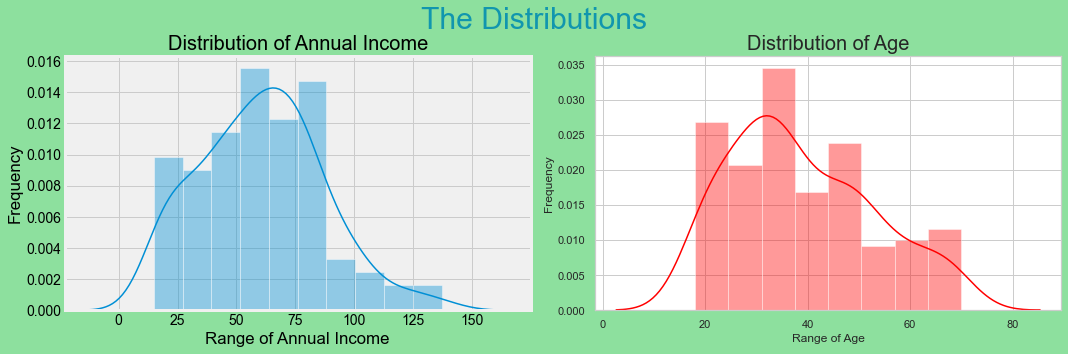

In [20]:
#plt.rcParams['figure.figsize'] = (15, 5)
plt.figure(figsize = (15, 5), facecolor = '#8DE09E')
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('\nDistribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('\nDistribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Frequency')

plt.suptitle('The Distributions\n', color = '#1196AE', fontsize = 30)
plt.tight_layout()
plt.show()

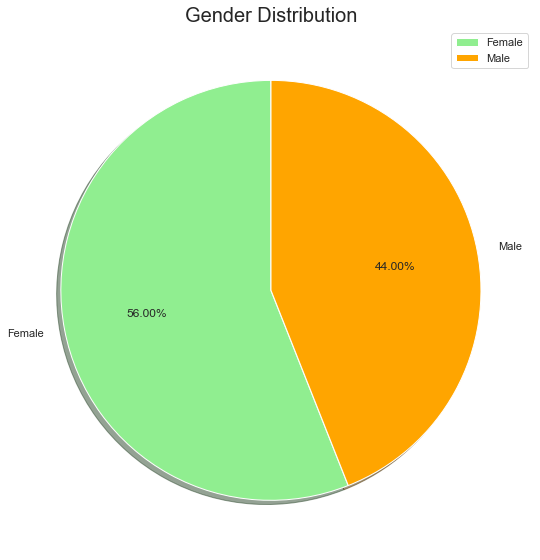

In [21]:
# Gender Pie Plot
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True,
       startangle = 90, autopct = '%.2f%%')
plt.title('Gender Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

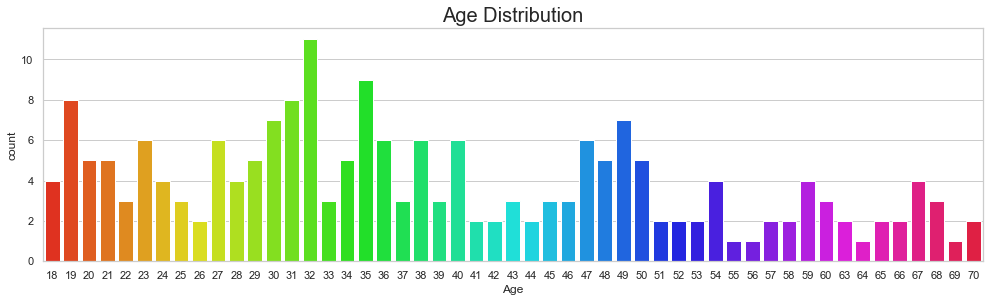

In [22]:
# Age Distribution
plt.rcParams['figure.figsize'] = (15, 4)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Age Distribution', fontsize = 20)
plt.show()

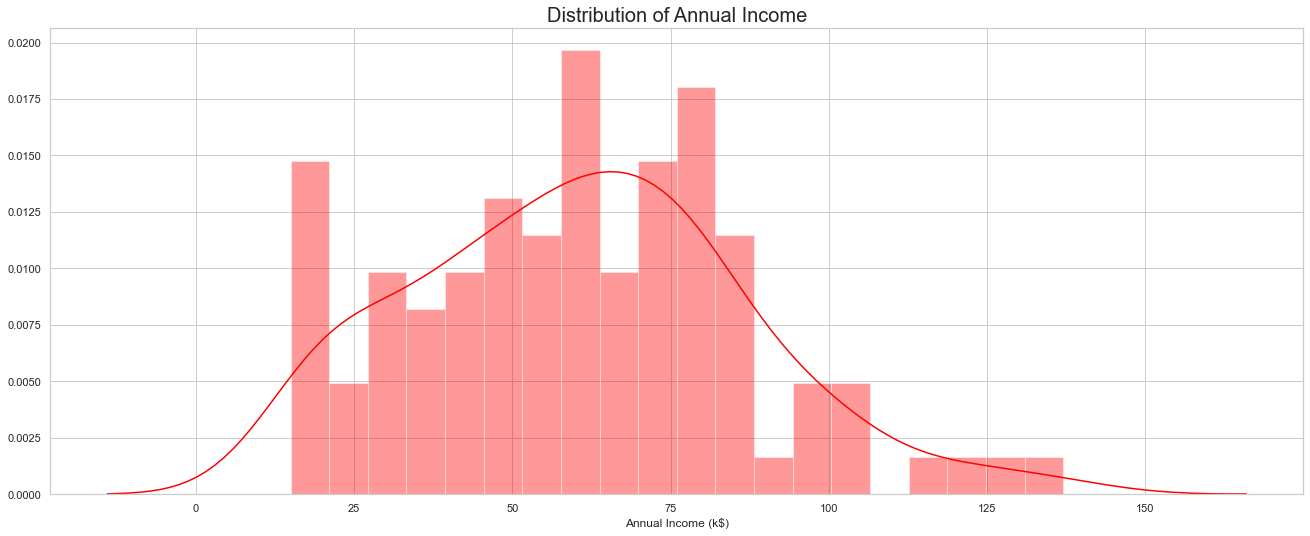

In [23]:
# Distribution of Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], bins = 20, color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

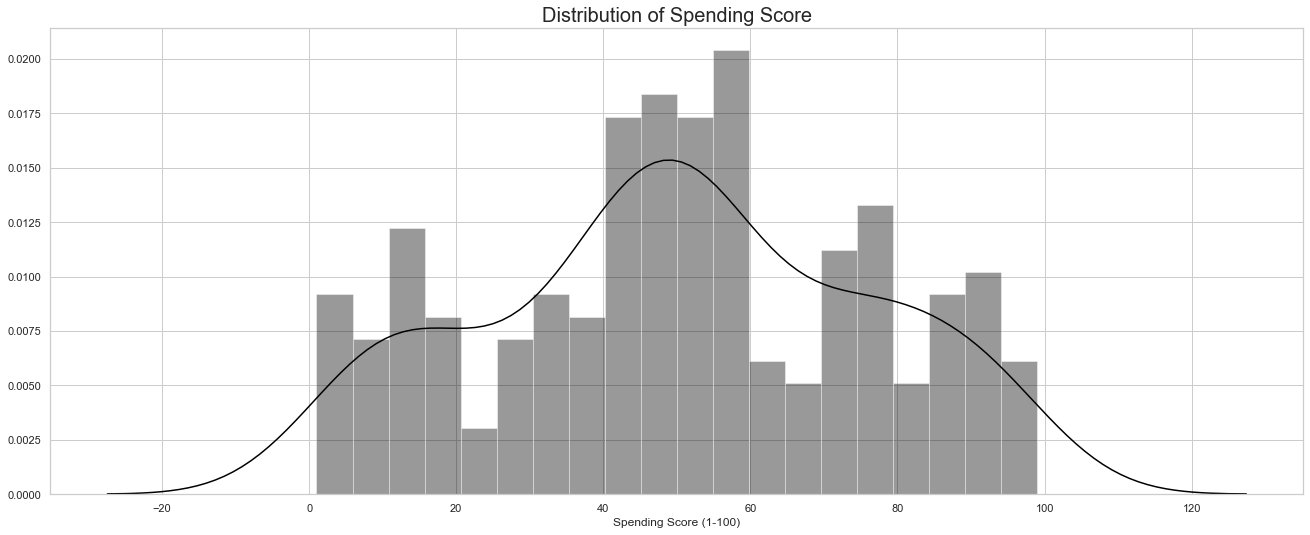

In [24]:
# Distribution of Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], bins = 20, color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

# Interactive Kernel Distribution Estimation Plot: kde_plot

In [25]:
# Let's make an interactive function to get the Kernel Distribution Estimation Plots

@interact

def kde_plot(feature = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    grid = sns.FacetGrid(data, aspect = 4)
    grid.map(sns.kdeplot, feature, color='green',shade=True)
    grid.add_legend()
    return grid

interactive(children=(Dropdown(description='feature', options=('Age', 'Annual Income (k$)', 'Spending Score (1…

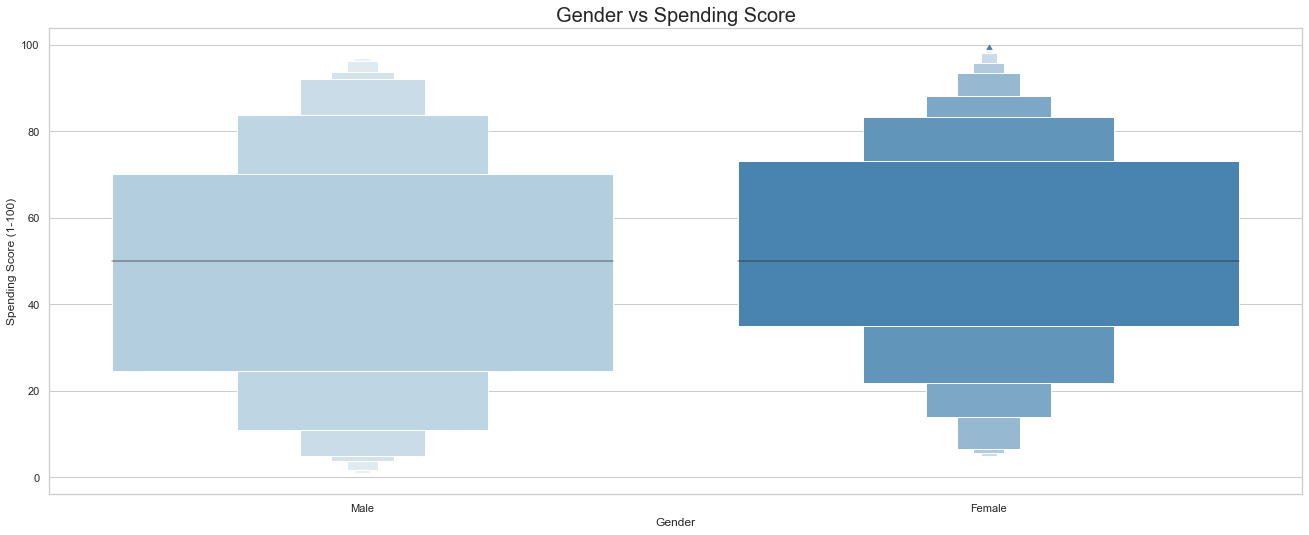

In [26]:
# Gender vs Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

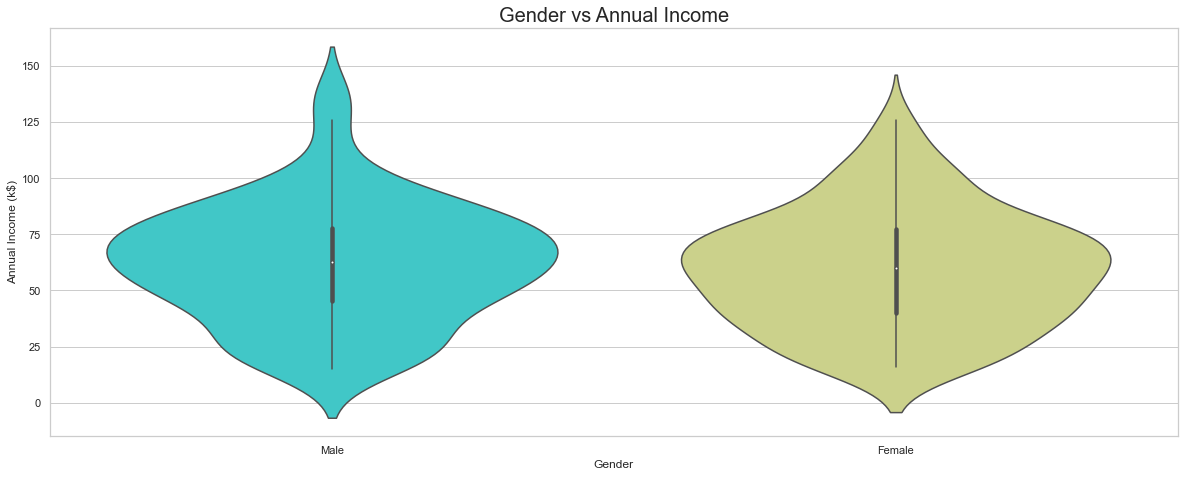

In [27]:
# Gender vs Annual Income
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

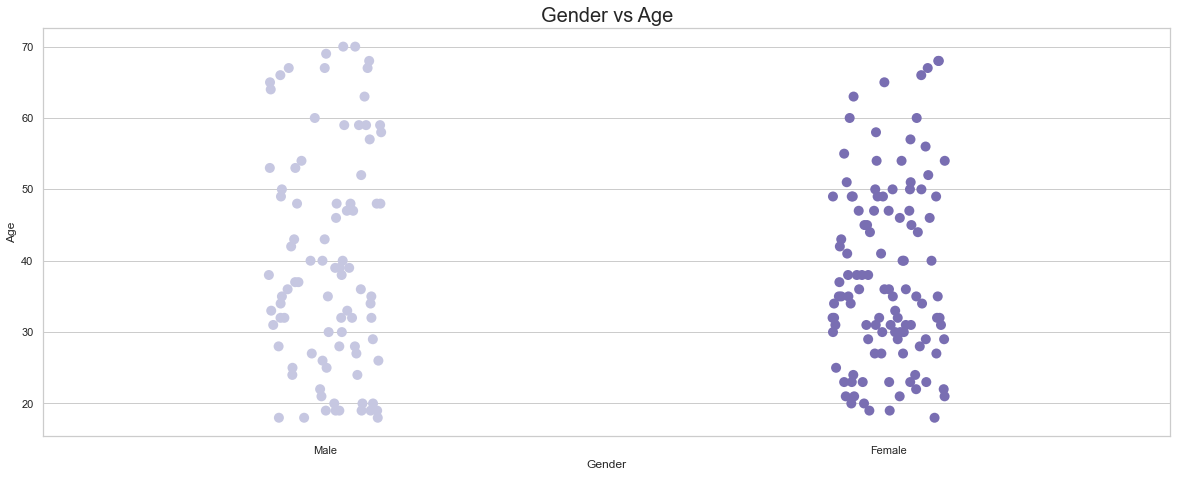

In [28]:
# Gender vs Age
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

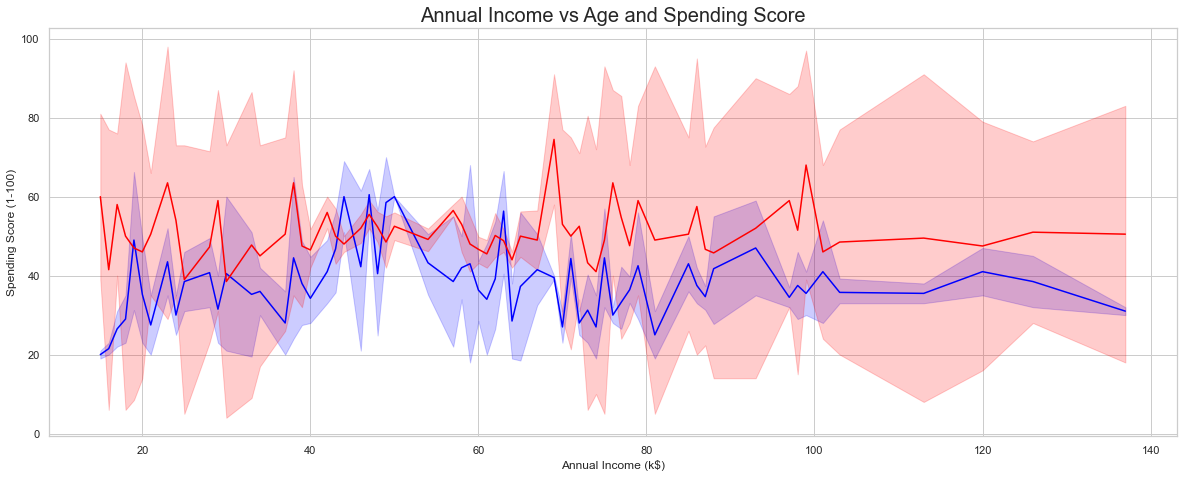

In [29]:
# Annual Income vs Age and Spending Score
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'red')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [30]:
# Gender: Age vs Spending Score
px.scatter(data,
          x = 'Age',
          y = 'Annual Income (k$)',
          color = 'Gender',
          title = 'Gender: Age vs Spending Score')

In [31]:
# Gender: Age vs Spending Score
px.scatter(data,
          x = 'Age',
          y = 'Spending Score (1-100)',
          color = 'Gender',
          title = 'Gender: Age vs Spending Score')

In [32]:
# Gender: Annual Income vs Spending Score
px.scatter(data,
          x = 'Annual Income (k$)',
          y = 'Spending Score (1-100)',
          color = 'Gender',
          title = 'Gender: Annual Income vs Spending Score')

# Let's Check For Outliers (Interactive)

In [33]:
# Let's make an interactive function to get the Box Plots: Check For Outliers

@interact

def box_plot(feature = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plot = px.box(data,
                  x = feature,
                  height = 300,
                  template = 'plotly_dark',
                  title = 'Box Plot for '+feature
                 )
    return plot.show()

interactive(children=(Dropdown(description='feature', options=('Age', 'Annual Income (k$)', 'Spending Score (1…

# KMeans Clustering Analysis

<h2 style="color:red;">Let's Look At Annual Income And Spending Score</h2>

In [34]:
data.head(2)

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0   Male   19                  15                      39
1   Male   21                  15                      81

In [35]:
# We want to identify clusters of Customers who share similar behavior
# Let's select the Spending Score and Annual Income Columns from the Data
x = data.loc[: , ['Annual Income (k$)', 'Spending Score (1-100)']].values
x.shape

(200, 2)

In [36]:
# Convert x into a DataFrame
x_data = pd.DataFrame(x)
x_data.head()

0   1
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40

# K-Means Algorithm

<h2 style="color:red;">Use the Elbow Method to find the Optimum Number of Clusters</h2>

### Graph the relationship: Number of Clusters vs WCSS

* WCSS: Within Cluster Sum of Squares (Inertia)
* This is the sum of the squared distance between each member in the cluster and its corresponding centroid.

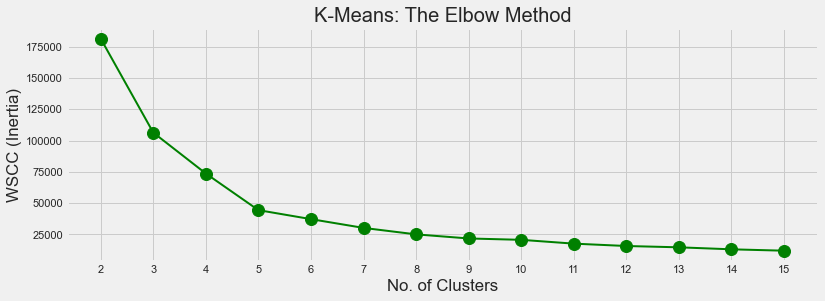

In [37]:
from sklearn.cluster import KMeans

cluster = []
wcss = []
for i in range(2, 16):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
    km.fit(x)
    # List of clusters
    cluster.append(i)
    # List of squared sum (inertia)
    wcss.append(km.inertia_)

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 4)    
plt.plot(cluster, wcss, color = 'green', marker = 'o', linewidth = 2, markersize = 12)
plt.title('K-Means: The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.xticks(cluster)
plt.ylabel('WSCC (Inertia)')

plt.show()

# Visualize the Clusters

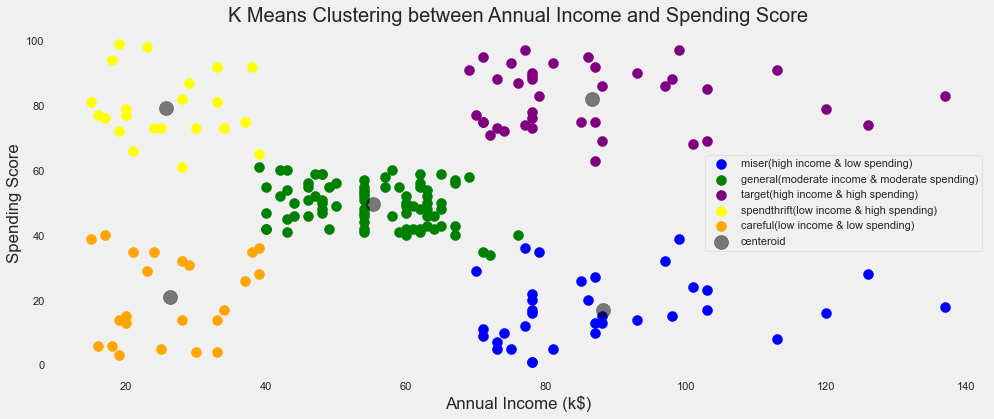

In [38]:
# Let's visualize the clusters
# Use 5 as the optimum number of clusters
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
y_means = km.fit_predict(x)

# Plot the Clusters
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', 
            label = 'miser(high income & low spending)')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', 
            label = 'general(moderate income & moderate spending)')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'purple', 
            label = 'target(high income & high spending)')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'yellow', 
            label = 'spendthrift(low income & high spending)')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', 
            label = 'careful(low income & low spending)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 200, c = 'black', alpha = 0.5, label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Evaluate The Quality OF The Clustering: Silhouette Values

## Range: -1 to 1
## Ideal: +1 (point is closed to it's assigned cluster)
## Least Preferred: -1 (point is closer to a neighbouring cluster, than it's assigned cluster)
## Boundary: 0 (point is on the boundary between two clusters)

In [39]:
# Import silhouette_score
from sklearn.metrics import silhouette_score

# Determine the score
score = silhouette_score(x, km.labels_, metric = 'euclidean')

print(f'The Silhouette Score: {score:.3f}')

The Silhouette Score: 0.554


## Silhouette Visualizer: Yellowbrick Library
### Visualize the Black Box Models

In [40]:
#!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

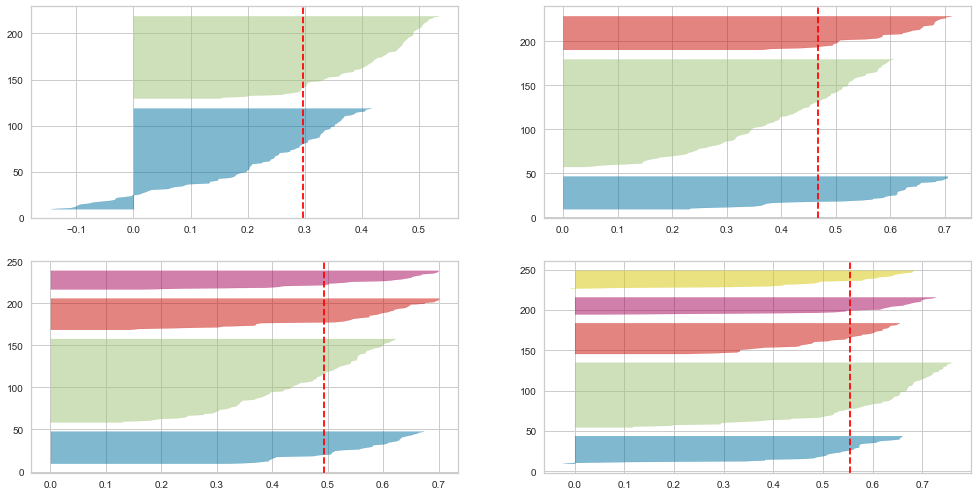

In [41]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
for i in [2, 3, 4, 5]:
    # Create instance of KMeans for different number of clusters
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
    q, mod = divmod(i, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q - 1][mod])
    visualizer.fit(x)

In [42]:
# Now, add the predictions to the INITIAL data and name the new DataFrame, data_plotly
data_plotly = data.copy()
data_plotly['Cluster'] = y_means

# Set the data type for the Cluster column to 'object'
data_plotly = data_plotly.astype({'Cluster': 'category'}) 
data_plotly.dtypes

Gender                      object
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Cluster                   category
dtype: object

In [43]:
data_plotly_cluster = {
    'Cluster_0': data_plotly[data_plotly.Cluster == 0],
    'Cluster_1': data_plotly[data_plotly.Cluster == 1],
    'Cluster_2': data_plotly[data_plotly.Cluster == 2],
    'Cluster_3': data_plotly[data_plotly.Cluster == 3],
    'Cluster_4': data_plotly[data_plotly.Cluster == 4]
}
data_plotly_cluster.keys()

dict_keys(['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4'])

## Using Plotly

In [44]:
# K-Means Clustering between PCA0 and PCA1: Centroids Included
fig_3 = go.Figure([
    go.Scatter(
        name = 'Cluster 0', 
        x = data_plotly_cluster['Cluster_0']['Annual Income (k$)'],
        y = data_plotly_cluster['Cluster_0']['Spending Score (1-100)'],
        text = ['Cluster 0' for i in range(len(data_plotly_cluster['Cluster_0']['Annual Income (k$)']))],
        customdata = data_plotly_cluster['Cluster_0'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'blue', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 1', 
        x = data_plotly_cluster['Cluster_1']['Annual Income (k$)'],
        y = data_plotly_cluster['Cluster_1']['Spending Score (1-100)'],
        text = ['Cluster 1' for i in range(len(data_plotly_cluster['Cluster_1']['Annual Income (k$)']))],
        customdata = data_plotly_cluster['Cluster_1'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'red', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 2', 
        x = data_plotly_cluster['Cluster_2']['Annual Income (k$)'],
        y = data_plotly_cluster['Cluster_2']['Spending Score (1-100)'],
        text = ['Cluster 2' for i in range(len(data_plotly_cluster['Cluster_2']['Annual Income (k$)']))],
        customdata = data_plotly_cluster['Cluster_2'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'green', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 3', 
        x = data_plotly_cluster['Cluster_3']['Annual Income (k$)'],
        y = data_plotly_cluster['Cluster_3']['Spending Score (1-100)'],
        text = ['Cluster 3' for i in range(len(data_plotly_cluster['Cluster_3']['Annual Income (k$)']))],
        customdata = data_plotly_cluster['Cluster_3'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'purple', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 4', 
        x = data_plotly_cluster['Cluster_4']['Annual Income (k$)'],
        y = data_plotly_cluster['Cluster_4']['Spending Score (1-100)'],
        text = ['Cluster 4' for i in range(len(data_plotly_cluster['Cluster_4']['Annual Income (k$)']))],
        customdata = data_plotly_cluster['Cluster_4'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'orange', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Centroid', 
        x = km.cluster_centers_[:, 0],
        y = km.cluster_centers_[:, 1],
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Centroid_x: %{x:.2f}", 
                                     "Centroid_y: %{y:.2f}", 
                                     '<extra></extra>']),
        text = [f'Centroid {i}' for i in range(len(km.cluster_centers_))],
        mode = 'markers',
        marker = dict(color = 'aquamarine', size = 20, opacity = 0.5),
        showlegend = True
    )
])
fig_3.update_layout(
    title = {'text': 'K Means Clustering between Annual Income and Spending Score', 
             'x': 0.1, 
             'y': 0.85,
             #'xanchor': 'center',
             #'yanchor': 'top'
            },
    template = 'plotly_dark',
    xaxis_title = 'Annual Income (k$)',
    yaxis_title = 'Spending Score (1-100)',
    hovermode = 'closest'
)
fig_3.update_xaxes(showspikes=True)
fig_3.update_yaxes(showspikes=True)
fig_3.show()

In [45]:
# Using Plotly Express
fig = px.scatter(data_plotly, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'Cluster', symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering: Annual Income vs Spending Score',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

# Find the Clustering Between Age and Spending Score

In [46]:
Y = data.loc[: , ['Age', 'Spending Score (1-100)']].values
Y_data = pd.DataFrame(x)
Y_data.head()

0   1
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40

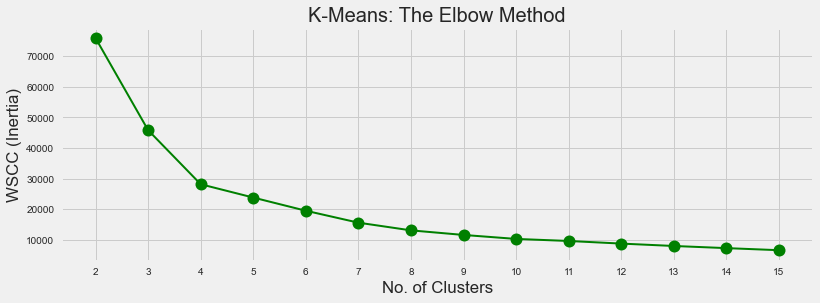

In [47]:
from sklearn.cluster import KMeans

cluster = []
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
    kmeans.fit(Y)
    # List of clusters
    cluster.append(i)
    # List of squared sum (inertia)
    wcss.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 4)
plt.plot(cluster, wcss, color = 'green', marker = 'o', linewidth = 2, markersize = 12)
plt.title('K-Means: The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.xticks(cluster)
#plt.xticks(np.arange(1, 11))
plt.ylabel('WSCC (Inertia)')
#plt.grid()
plt.show()

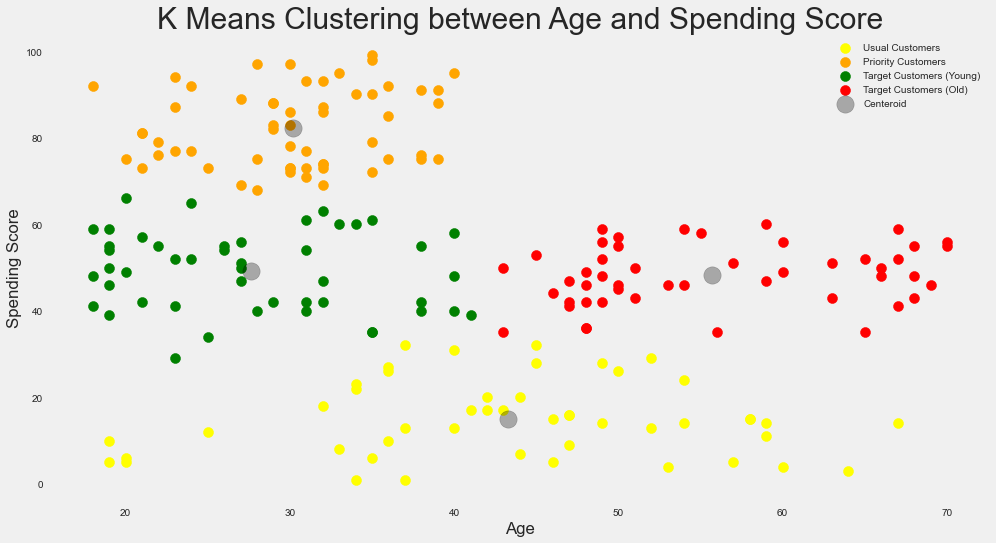

In [48]:
# Let's visualize the clusters
# Use 4 as the optimum number of clusters
plt.style.use('fivethirtyeight')

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
y_means = kmeans.fit_predict(Y)
# 1 --> Spending Score,  0 --> Annual Income
plt.rcParams['figure.figsize'] = (15, 8)

plt.scatter(Y[y_means == 0, 0], Y[y_means == 0, 1], s = 100, c = 'yellow', label = 'Usual Customers')
plt.scatter(Y[y_means == 1, 0], Y[y_means == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(Y[y_means == 2, 0], Y[y_means == 2, 1], s = 100, c = 'green', label = 'Target Customers (Young)')
plt.scatter(Y[y_means == 3, 0], Y[y_means == 3, 1], s = 100, c = 'red', label = 'Target Customers (Old)')
# The centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', alpha = 0.3, 
            label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Age and Spending Score', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [49]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

In [50]:
# Now, add the predictions to the INITIAL data and name the new DataFrame, data_KMeans
Ydata_KMeans = data.copy()
Ydata_KMeans['Cluster'] = y_means

# Set the data type for the Cluster column to 'object'
Ydata_KMeans['Cluster'] = Ydata_KMeans['Cluster'].astype('category')
#Ydata_KMeans = Ydata_KMeans.astype({'Cluster': 'category'})
Ydata_KMeans.dtypes

Gender                      object
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Cluster                   category
dtype: object

In [51]:
Ydata_KMeans.Cluster.value_counts().sort_index()

0    48
1    57
2    47
3    48
Name: Cluster, dtype: int64

In [52]:
data_cluster = {
    'Cluster_0': Ydata_KMeans[Ydata_KMeans.Cluster == 0],
    'Cluster_1': Ydata_KMeans[Ydata_KMeans.Cluster == 1],
    'Cluster_2': Ydata_KMeans[Ydata_KMeans.Cluster == 2],
    'Cluster_3': Ydata_KMeans[Ydata_KMeans.Cluster == 3]
}

In [53]:
data_cluster['Cluster_1'].columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')

In [54]:
# K-Means Clustering between Age and Spending Score
fig_1 = go.Figure([
    go.Scatter(
        name = 'Cluster 0: Usual Customers', 
        x = data_cluster['Cluster_0']['Age'],
        y = data_cluster['Cluster_0']['Spending Score (1-100)'],
        customdata = data_cluster['Cluster_0'][['Annual Income (k$)', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Spending Score: %{y}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Age: %{x}",
                                     "Gender: %{customdata[1]}",
                                     "<extra></extra>"]),
        text = ['Cluster 0' for i in range(len(data_cluster['Cluster_0']['Age']))],
        mode = 'markers',
        marker = dict(color = 'blue', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 1: Priority Customers', 
        x = data_cluster['Cluster_1']['Age'],
        y = data_cluster['Cluster_1']['Spending Score (1-100)'],
        customdata = data_cluster['Cluster_1'][['Annual Income (k$)', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Spending Score: %{y}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Age: %{x}",
                                     "Gender: %{customdata[1]}",
                                     "<extra></extra>"]),
        text = ['Cluster 1' for i in range(len(data_cluster['Cluster_1']['Age']))],
        mode = 'markers',
        marker = dict(color = 'purple', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 2: Target Customers (Young)', 
        x = data_cluster['Cluster_2']['Age'],
        y = data_cluster['Cluster_2']['Spending Score (1-100)'],
        customdata = data_cluster['Cluster_2'][['Annual Income (k$)', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Spending Score: %{y}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Age: %{x}",
                                     "Gender: %{customdata[1]}",
                                     "<extra></extra>"]),
        text = ['Cluster 2' for i in range(len(data_cluster['Cluster_2']['Age']))],
        mode = 'markers',
        marker = dict(color = 'brown', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 3: Target Customers (Old)', 
        x = data_cluster['Cluster_3']['Age'],
        y = data_cluster['Cluster_3']['Spending Score (1-100)'],
        customdata = data_cluster['Cluster_3'][['Annual Income (k$)', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Spending Score: %{y}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Age: %{x}",
                                     "Gender: %{customdata[1]}",
                                     "<extra></extra>"]),
        text = ['Cluster 3' for i in range(len(data_cluster['Cluster_3']['Age']))],
        mode = 'markers',
        marker = dict(color = 'yellow', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Centroid', 
        x = kmeans.cluster_centers_[:, 0],
        y = kmeans.cluster_centers_[:, 1],
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Centroid_x: %{x:.2f}", 
                                     "Centroid_y: %{y:.2f}", 
                                     '<extra></extra>']),
        text = [f'Centroid {i}' for i in range(len(kmeans.cluster_centers_))],
        mode = 'markers',
        marker = dict(color = 'aquamarine', size = 20, opacity = 0.5),
        showlegend = True
    )
])
fig_1.update_layout(
    title = {'text': 'K-Means Clustering between Age and Spending Score', 
             'x': 0.1, 
             'y': 0.85,
             #'xanchor': 'center',
             #'yanchor': 'top'
            }, 
    template = 'plotly_dark',
    xaxis_title = 'Age',
    yaxis_title = 'Spending Score (1-100)',
    hovermode = 'closest'
)
fig_1.update_xaxes(showspikes=True)
fig_1.update_yaxes(showspikes=True)
fig_1.show()

In [55]:
# Using Plotly Express
fig = px.scatter(Ydata_KMeans, x = 'Age', y = 'Spending Score (1-100)', color = 'Cluster', symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering: Age vs Spending Score',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

# Let's Consider: Age,  Annual Income and Spending Score

In [56]:
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [57]:
Z = data.iloc[:, 1:].values
Z

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [58]:
# Standardize the features by scaling to unit variance
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)
Z_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

# Implement K-Means Clustering

In [59]:
# Create an instance of K-Means
Zkmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
Zkmeans

KMeans(n_clusters=4, random_state=0)

In [60]:
# Cheack the parameters of K-Means
# k-means++ initializes the centroid to be distant from each other,
# leading to better results than random initialization
Zkmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [61]:
# Fit kmeans to data_one_hot
Zkmeans.fit(Z_scaled)

KMeans(n_clusters=4, random_state=0)

### Inertia measures how internally coherent the clusters are

In [62]:
# Check the inertia
# The lowest SSE
# Sum of Squared Distances of samples to their closet cluster center
Zkmeans.inertia_

205.22514747675913

In [63]:
# Check the Centroids
Zkmeans.cluster_centers_

array([[-0.42880597,  0.97484722,  1.21608539],
       [-0.96249203, -0.78476346,  0.39202966],
       [ 0.03720536,  0.99011499, -1.18875705],
       [ 1.08616125, -0.49056525, -0.39717443]])

In [64]:
# Check the number of iterations
Zkmeans.n_iter_

6

In [65]:
# Check the current labels
Zkmeans.labels_

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 1, 3, 3, 3, 3, 1, 2, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

# Now Let's Find The Best Number of Clusters

In [66]:
# Check the optimal number of clusters using a for loop
cluster = []
sse = []
for k in range (2, 16):
    Zkmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
    Zkmeans.fit(Z_scaled)
    # List of clusters
    cluster.append(k)
    # List of squared sum (inertia)
    sse.append(Zkmeans.inertia_)

In [67]:
# Store the errors in a DataFrame
cluster_sse_df = pd.DataFrame({'Cluster': cluster,
                              'sse': sse})
cluster_sse_df

Cluster         sse
0         2  389.386189
1         3  295.456245
2         4  205.225147
3         5  168.247580
4         6  133.888870
5         7  117.169115
6         8  103.944236
7         9   93.614553
8        10   81.848950
9        11   72.851626
10       12   67.043257
11       13   64.111493
12       14   60.410255
13       15   57.062867

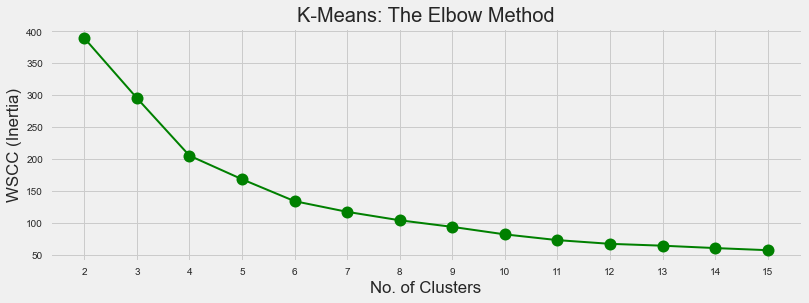

In [68]:
# Let's plot the sse
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 4)
plt.plot(cluster_sse_df['Cluster'], cluster_sse_df['sse'],  color = 'green', marker = 'o', linewidth = 2, markersize = 12)
plt.title('K-Means: The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.xticks(cluster)
plt.ylabel('WSCC (Inertia)')
plt.show()

# Finding the Optimal  Number of Clusters: Using the kneed module

The optimal number of clusters is: 6


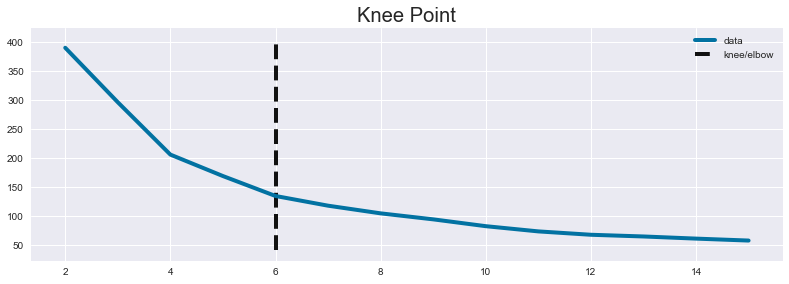

In [69]:
# Use the KneeLocator to get the optimal number of clusters
# Create an instance of KneeLocator

x = cluster_sse_df['Cluster']
y = cluster_sse_df['sse']
kneedle = KneeLocator(x, y, S=1.0, curve = 'convex', direction = 'decreasing')
# Now check the optimal number of clusters
optimal_clusters = kneedle.elbow
print(f'The optimal number of clusters is: {optimal_clusters}')
plt.style.use('seaborn-darkgrid')
kneedle.plot_knee(figsize = (12, 4))

# Finally, Create KMeans Using the Optimal Number of Clusters

In [70]:
# Create KMeans Using the Optimal Number of Clusters
Zkmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
print(Zkmeans)
# Fit the model
Zkmeans.fit(Z_scaled)
# Make prediction of the clusters
predictions = Zkmeans.predict(Z_scaled)

KMeans(n_clusters=6, random_state=0)


In [71]:
predictions

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [72]:
# Check the Centroids
Zkmeans.cluster_centers_

array([[-0.85043527, -0.14894113, -0.04147777],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [ 0.47895722, -1.30822992, -1.19644353],
       [-0.99396865, -1.34734766,  1.06404834]])

In [73]:
# Now, add the predictions to the INITIAL data and name the new DataFrame, data_KMeans
Zdata_KMeans = data.copy()
Zdata_KMeans['Cluster'] = predictions

# Set the data type for the Cluster column to 'object'
Zdata_KMeans = Zdata_KMeans.astype({'Cluster': 'category'})
Zdata_KMeans.dtypes

Gender                      object
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
Cluster                   category
dtype: object

In [74]:
# Now, add the predictions to the INITIAL data
Zdata_KMeans['Cluster'].value_counts()

1    45
2    39
0    38
3    34
5    23
4    21
Name: Cluster, dtype: int64

In [75]:
# Check the data
Zdata_KMeans.head(10)

Gender  Age  Annual Income (k$)  Spending Score (1-100) Cluster
0    Male   19                  15                      39       5
1    Male   21                  15                      81       5
2  Female   20                  16                       6       4
3  Female   23                  16                      77       5
4  Female   31                  17                      40       4
5  Female   22                  17                      76       5
6  Female   35                  18                       6       4
7  Female   23                  18                      94       5
8    Male   64                  19                       3       4
9  Female   30                  19                      72       5

In [76]:
print(list(Zdata_KMeans.columns))

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']


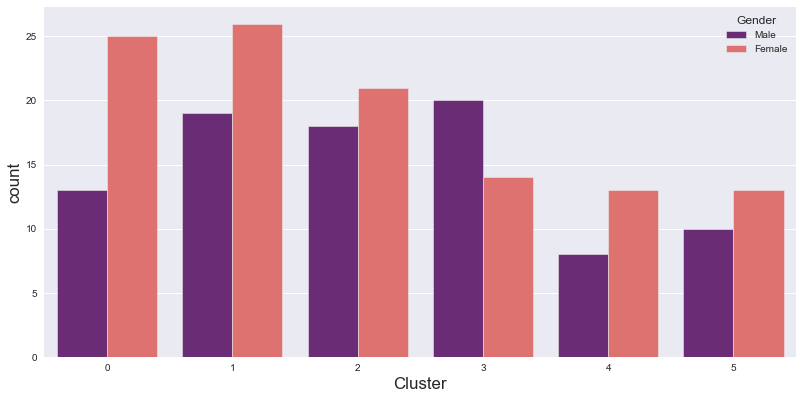

In [77]:
# Plot a countplot of the clusters with Gender as the Hue
plt.figure(figsize = (12, 6))
sns.countplot(data = Zdata_KMeans, x = 'Cluster', hue = 'Gender', palette = 'magma')
plt.show()

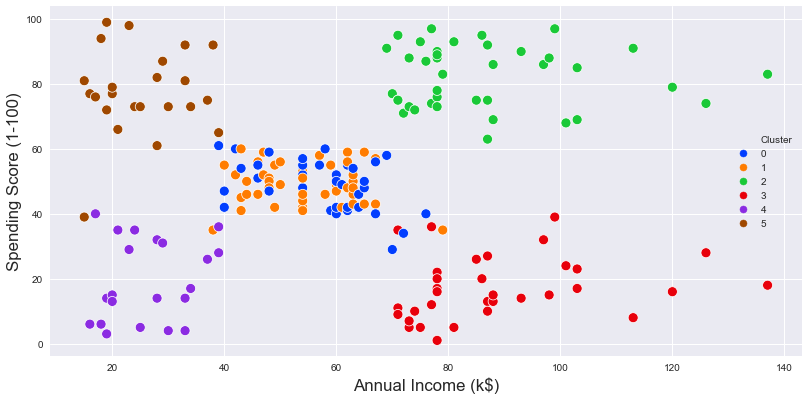

In [78]:
# Plot a Scatter Plot of the Annual Income (k$) vs Spending Score (1-100), with Hue as the Clusters
plt.figure(figsize = (12, 6))
sns.scatterplot(data = Zdata_KMeans, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', 
                palette = 'bright', s = 100)
plt.show()

In [79]:
# Using Plotly Express
fig = px.scatter(Zdata_KMeans, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'Cluster', symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering: Annual Income vs Spending Score',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

In [80]:
fig = px.scatter_3d(Zdata_KMeans, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', z = 'Age',
                    color = 'Cluster', symbol = 'Gender', 
                    template = 'plotly_dark', #ggplot2
                    title = 'K-Means Clustering: Age, Annual Income, Spending Score',
                    category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']})
fig.update_traces(marker = dict(size = 5,
                                opacity = 1,
                                line = dict(
                                    width = 0.5,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

# K-Means Clustering: Unsupervised Machine Learning Algorithm

<h2 style="color:red;">Let's Look At Age, Annual Income and Spending Score</h2>

### Scaling, PCA and K-Means
### PCA: Reduce to 2 Dimensions

In [81]:
# Standardize the features with StandardScaler()
Z_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## Use PCA to reduce the Dimensions from 3 to 2

In [82]:
# Import PCA Module
from sklearn.decomposition import PCA

In [83]:
# Instantiate PCA (2-Dim)
pca = PCA(n_components = 2)

# Reduce dimension of the data
Z_scaled_pca = pca.fit_transform(Z_scaled)

# Explained Variance Ratio
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'The Total Explained Variance: {total_var:.2f}%')
Z_scaled_pca

The Total Explained Variance: 77.57%


array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

## Retrieve the loading values
* Principal axes in feature space, representing the directions of maximum variance in the data.

In [84]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=['PCA0', 'PCA1'], index=data.iloc[:, 1:].columns)
loadings_df

PCA0      PCA1
Age                     0.706382  0.030141
Annual Income (k$)     -0.048024  0.998832
Spending Score (1-100) -0.706199 -0.037775

# Now Let's Find The Best Number of Clusters

In [85]:
from sklearn.cluster import KMeans

Cluster = []
WCSS = []
for k in range(2, 16):
    Kmeans_model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
    Kmeans_model.fit(Z_scaled_pca)
    # List of clusters
    Cluster.append(k)
    # List of squared sum (inertia)
    WCSS.append(Kmeans_model.inertia_)
    
# Store the inertia in a DataFrame
Cluster_WCSS_df = pd.DataFrame({'Cluster': Cluster,
                              'WCSS': WCSS})
Cluster_WCSS_df

Cluster        WCSS
0         2  254.843445
1         3  177.230331
2         4  122.908704
3         5   98.950105
4         6   82.150861
5         7   70.374669
6         8   59.806832
7         9   49.746764
8        10   43.974200
9        11   39.811200
10       12   35.768068
11       13   33.290572
12       14   31.166360
13       15   28.591662

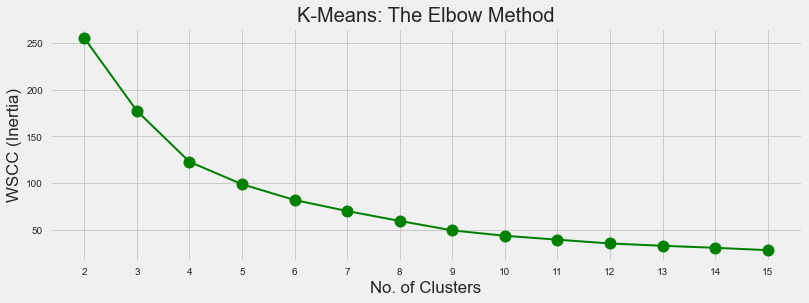

In [86]:
# Let's plot the WSCC
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 4)
plt.plot(Cluster_WCSS_df['Cluster'], Cluster_WCSS_df['WCSS'],  color = 'green', marker = 'o', 
         linewidth = 2, markersize = 12)
plt.title('K-Means: The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.xticks(cluster)
plt.ylabel('WSCC (Inertia)')
plt.show()

# Finding the Optimal  Number of Clusters: Using the kneed module

In [87]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


The optimal number of clusters is: 5


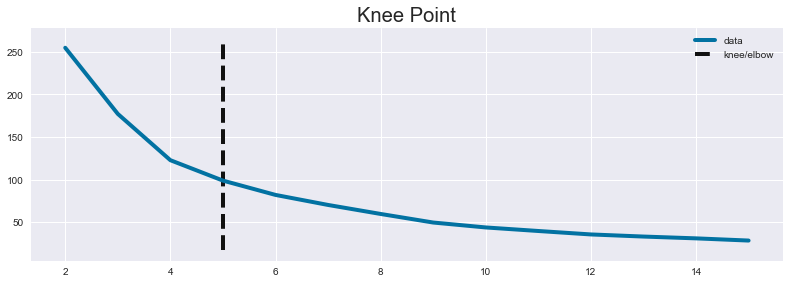

In [88]:
# Use the KneeLocator to get the optimal number of clusters
# Create an instance of KneeLocator

x = Cluster_WCSS_df['Cluster']
y = Cluster_WCSS_df['WCSS']
kneedle = KneeLocator(x, y, S=1.0, curve = 'convex', direction = 'decreasing')
# Now check the optimal number of clusters
optimal_clusters = kneedle.elbow
print(f'The optimal number of clusters is: {optimal_clusters}')
plt.style.use('seaborn-darkgrid')
kneedle.plot_knee(figsize = (12, 4))

In [89]:
# Now check the optimal number of clusters
optimal_clusters = kneedle.elbow
optimal_clusters

5

# Now, Create KMeans Using the Optimal Number of Clusters

In [90]:
# Create KMeans Using the Optimal Number of Clusters
Kmeans_model = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter = 300,
               n_init = 10, random_state = seed)
print(Kmeans_model)
# Fit the model
Kmeans_model.fit(Z_scaled_pca)
# Make prediction of the clusters
predictions_pca = Kmeans_model.predict(Z_scaled_pca)
predictions_pca

KMeans(n_clusters=5, random_state=0)


array([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3,
       4, 2, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 4, 0, 4, 4, 4, 4, 1, 4, 1, 0, 1, 0, 4, 0, 4,
       4, 1, 4, 1, 0, 1, 4, 4, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [91]:
# Now, add the predictions, PCA1 and PCA2 to the INITIAL data and name the new DataFrame, data_scaled_pca
data_scaled_pca = data.copy()

# Principal Component Axes
data_scaled_pca['PCA0'] = Z_scaled_pca[: , 0]
data_scaled_pca['PCA1'] = Z_scaled_pca[: , 1]

# Clusters
data_scaled_pca['Cluster'] = predictions_pca

# Set the data type for the Cluster column to 'category'
data_scaled_pca = data_scaled_pca.astype({'Cluster': 'category'})
data_scaled_pca.dtypes

Gender                      object
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
PCA0                       float64
PCA1                       float64
Cluster                   category
dtype: object

In [92]:
data_scaled_pca.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)      PCA0  \
0    Male   19                  15                      39 -0.615720   
1    Male   21                  15                      81 -1.665793   
2  Female   20                  16                       6  0.337862   
3  Female   23                  16                      77 -1.456573   
4  Female   31                  17                      40 -0.038465   

       PCA1 Cluster  
0 -1.763481       3  
1 -1.820747       3  
2 -1.674799       2  
3 -1.772430       3  
4 -1.662740       3

### Plot the Clusters with the Principal Component Axes

In [93]:
# Check the Centroids
Kmeans_model.cluster_centers_

array([[ 1.03849522,  1.1199511 ],
       [-1.27551562,  0.97464215],
       [ 1.11177088, -0.59287373],
       [-1.29455069, -1.31287414],
       [-0.40058107, -0.04587051]])

In [94]:
# The Clusters
data_scaled_pca_cluster = {
    'Cluster_0': data_scaled_pca[data_scaled_pca.Cluster == 0],
    'Cluster_1': data_scaled_pca[data_scaled_pca.Cluster == 1],
    'Cluster_2': data_scaled_pca[data_scaled_pca.Cluster == 2],
    'Cluster_3': data_scaled_pca[data_scaled_pca.Cluster == 3],
    'Cluster_4': data_scaled_pca[data_scaled_pca.Cluster == 4],
}

In [95]:
# K-Means Clustering between PCA0 and PCA1: Centroids Included
fig_3 = go.Figure([
    go.Scatter(
        name = 'Cluster 0', 
        x = data_scaled_pca_cluster['Cluster_0']['PCA0'],
        y = data_scaled_pca_cluster['Cluster_0']['PCA1'],
        text = ['Cluster 0' for i in range(len(data_scaled_pca_cluster['Cluster_0']['PCA0']))],
        customdata = data_scaled_pca_cluster['Cluster_0'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "PCA0: %{x:.2f}",
                                     "PCA1: %{y:.2f}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'blue', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 1', 
        x = data_scaled_pca_cluster['Cluster_1']['PCA0'],
        y = data_scaled_pca_cluster['Cluster_1']['PCA1'],
        text = ['Cluster 1' for i in range(len(data_scaled_pca_cluster['Cluster_1']['PCA0']))],
        customdata = data_scaled_pca_cluster['Cluster_1'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "PCA0: %{x:.2f}",
                                     "PCA1: %{y:.2f}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'red', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 2', 
        x = data_scaled_pca_cluster['Cluster_2']['PCA0'],
        y = data_scaled_pca_cluster['Cluster_2']['PCA1'],
        text = ['Cluster 2' for i in range(len(data_scaled_pca_cluster['Cluster_2']['PCA0']))],
        customdata = data_scaled_pca_cluster['Cluster_2'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "PCA0: %{x:.2f}",
                                     "PCA1: %{y:.2f}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'green', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 3', 
        x = data_scaled_pca_cluster['Cluster_3']['PCA0'],
        y = data_scaled_pca_cluster['Cluster_3']['PCA1'],
        text = ['Cluster 3' for i in range(len(data_scaled_pca_cluster['Cluster_3']['PCA0']))],
        customdata = data_scaled_pca_cluster['Cluster_3'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "PCA0: %{x:.2f}",
                                     "PCA1: %{y:.2f}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'purple', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Cluster 4', 
        x = data_scaled_pca_cluster['Cluster_4']['PCA0'],
        y = data_scaled_pca_cluster['Cluster_4']['PCA1'],
        text = ['Cluster 4' for i in range(len(data_scaled_pca_cluster['Cluster_4']['PCA0']))],
        customdata = data_scaled_pca_cluster['Cluster_4'][['Annual Income (k$)','Spending Score (1-100)',
                                                           'Age', 'Gender']].values,
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "PCA0: %{x:.2f}",
                                     "PCA1: %{y:.2f}",
                                     "Annual Income (k$): %{customdata[0]}",
                                     "Spending Score (1-100): %{customdata[1]}",
                                     "Age: %{customdata[2]}",
                                     "Gender: %{customdata[3]}",
                                     "<extra></extra>"]),
        mode = 'markers',
        marker = dict(color = 'orange', size = 10, opacity = 1),
        showlegend = True
    ),
    go.Scatter(
        name = 'Loadings', 
        x = loadings_df['PCA0'],
        y = loadings_df['PCA1'],
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Loadings_PCA0: %{x:.2f}", 
                                     "Loadings_PCA1: %{y:.2f}", 
                                     '<extra></extra>']),
        text = [i for i in loadings_df.index],
        mode = 'markers',
        marker = dict(color = 'brown', size = 40, opacity = 0.7),
        showlegend = True
    ),
    go.Scatter(
        name = 'Centroid', 
        x = Kmeans_model.cluster_centers_[:, 0],
        y = Kmeans_model.cluster_centers_[:, 1],
        hovertemplate = "<br>".join(["<b>%{text}</b>",
                                     "Centroid_PCA0: %{x:.2f}", 
                                     "Centroid_PCA1: %{y:.2f}", 
                                     '<extra></extra>']),
        text = [f'Centroid {i}' for i in range(len(Kmeans_model.cluster_centers_))],
        mode = 'markers',
        marker = dict(color = 'aquamarine', size = 20, opacity = 0.5),
        showlegend = True
    )
])
fig_3.update_layout(
    title = {'text': 'K-Means Clustering between Principal Components', 
             'x': 0.1, 
             'y': 0.85,
             #'xanchor': 'center',
             #'yanchor': 'top'
            }, 
    template = 'plotly_dark',
    xaxis_title = 'PCA0',
    yaxis_title = 'PCA1',
    hovermode = 'closest'
)
fig_3.update_xaxes(showspikes=True)
fig_3.update_yaxes(showspikes=True)
fig_3.show()

In [96]:
# Using Plotly Express
fig = px.scatter(data_scaled_pca, x = 'PCA0', y = 'PCA1', color = 'Cluster', symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'PCA0': ':.2f',
                              'PCA1': ':.2f',
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering between Principal Components(Featuring Gender)',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

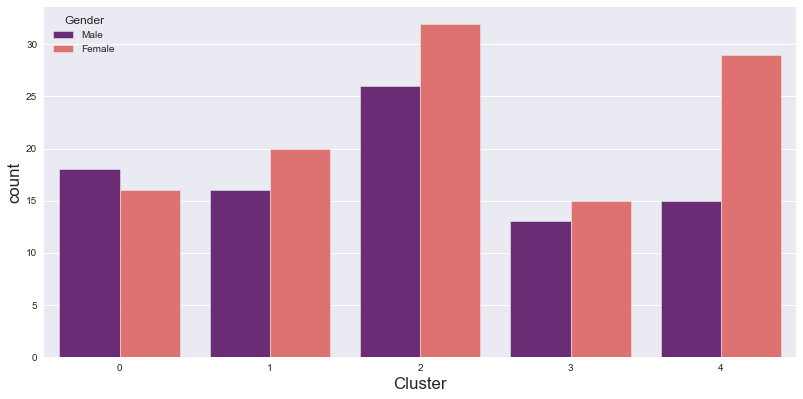

In [97]:
# Plot a countplot of the clusters with Gender as the Hue
plt.figure(figsize = (12, 6))
sns.countplot(data = data_scaled_pca, x = 'Cluster', hue = 'Gender', palette = 'magma')
plt.show()

In [98]:
# Cross Tabulation
pd.crosstab(data_scaled_pca['Gender'], data_scaled_pca['Cluster'])

Cluster   0   1   2   3   4
Gender                     
Female   16  20  32  15  29
Male     18  16  26  13  15

## View A 3D Plot of the Clusters

In [99]:
fig = px.scatter_3d(data_scaled_pca, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', z = 'Age',
                    color = 'Cluster', symbol = 'Gender', 
                    template = 'plotly_dark', #ggplot2
                    title = 'K-Means Clustering: Age, Annual Income, Spending Score (with PCA)',
                    category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']})
fig.update_traces(marker = dict(size = 5,
                                opacity = 1,
                                line = dict(
                                    width = 0.5,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
# Tight Layout
fig.update_layout(margin = dict(l = 0, r = 0, b = 5, t = 35))
fig.show()

## Let's Look at: Age vs Spending Score

In [100]:
# Using Plotly Express
fig = px.scatter(data_scaled_pca, x = 'Age', y = 'Spending Score (1-100)', color = 'Cluster', symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering: Age vs Spending Score (with PCA)',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

## Let's Look at: Annual Income vs Spending Score

In [101]:
# Using Plotly Express
fig = px.scatter(data_scaled_pca, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', color = 'Cluster', 
                 symbol = 'Gender',
                 hover_data = {'Cluster': True,
                              'Annual Income (k$)': True,
                              'Spending Score (1-100)': True,
                              'Age': True,
                              'Gender': True},
                 template = 'plotly_dark',
                title = 'K-Means Clustering: Annual Income vs Spending Score (with PCA)',
                category_orders={'Cluster': [0, 1, 2, 3, 4],
                                'Gender': ['Female', 'Male']}
                )
fig.update_traces(marker = dict(size = 10,
                                opacity = 1,
                                line = dict(
                                    width = 1,
                                    color = 'white'
                                )
                               ),
                  selector = dict(mode = 'markers')
                 )
fig.show()

# To See The Workings Of An Algorithm

In [102]:
#!pip install mglearn
# Import to vilualize the workings of any Machine Learning Algorithm
import mglearn

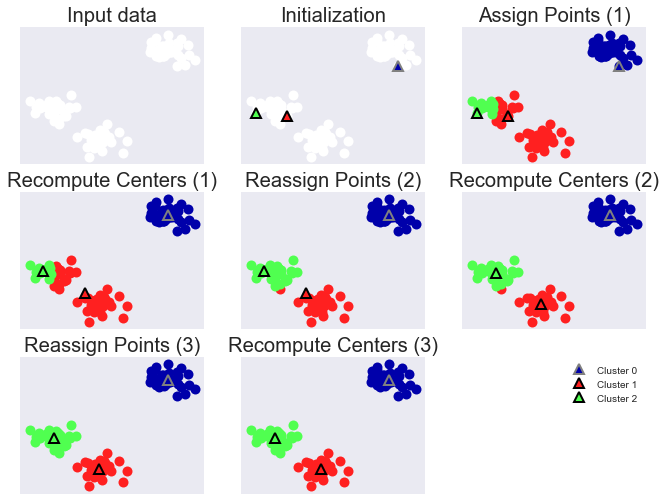

In [103]:
mglearn.plots.plot_kmeans_algorithm()